In [1]:
#%matplotlib
#%matplotlib inline
import numpy as np
from math import comb
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d

In [2]:
nome = 'Ge.xyz'
f = open(nome)
data = f.readlines() #Retorna uma lista contendo as linhas do arquivo
data = [line.strip().split() for line in data] #Remove os espaços e isola as coordenadas
data

[['216'],
 ['100', '0', '0'],
 ['Ge', '0.0001519560510179', '0.01977331053476', '-0.01993796069407'],
 ['Ge', '-0.01942048447972', '2.805893848131', '2.816428497902'],
 ['Ge', '2.853087214211', '2.775248718765', '-0.01769086580866'],
 ['Ge', '2.833823954538', '0.01975747415924', '2.780607937414'],
 ['Ge', '4.178109282151', '1.394845085369', '4.2918255843'],
 ['Ge', '1.474720793264', '1.400055963729', '1.352129067726'],
 ['Ge', '1.399292158155', '4.272402393784', '4.210283849562'],
 ['Ge', '4.198437666375', '4.241669966627', '1.414977656161'],
 ['Ge', '0.04540562706355', '0.06376307148138', '5.54416911922'],
 ['Ge', '0.04897898055329', '2.888442801728', '8.482100897031'],
 ['Ge', '2.86039811833', '2.821666338714', '5.640049899695'],
 ['Ge', '2.808462840849', '-0.0302073222241', '8.492837931052'],
 ['Ge', '4.269546980003', '1.405378618015', '9.856453035567'],
 ['Ge', '1.355881052191', '1.468375697148', '7.066875592878'],
 ['Ge', '1.46800265354', '4.188099022277', '9.911629579895'],
 ['Ge

In [3]:
num_atoms = int(data[0][0]) #Retorna como int o primeiro elemento da primeira lista/linha = número de átomos
dims = 3 #Número de dimensões
coords = np.zeros((num_atoms,dims)) #Linha,coluna

for i in range(num_atoms):
    x = float(data[i+2][1]) #+2: átomos começam na terceira linha do arquivo
    y = float(data[i+2][2]) 
    z = float(data[i+2][3])
    coords[i] = x,y,z

In [4]:
#Testes dos dados

#print(data[0])
#print(data[0][0])
#print(data[1])
#print(data[2])
#print(data[1][1])
print(len(coords))
print(coords)

216
[[ 1.51956051e-04  1.97733105e-02 -1.99379607e-02]
 [-1.94204845e-02  2.80589385e+00  2.81642850e+00]
 [ 2.85308721e+00  2.77524872e+00 -1.76908658e-02]
 [ 2.83382395e+00  1.97574742e-02  2.78060794e+00]
 [ 4.17810928e+00  1.39484509e+00  4.29182558e+00]
 [ 1.47472079e+00  1.40005596e+00  1.35212907e+00]
 [ 1.39929216e+00  4.27240239e+00  4.21028385e+00]
 [ 4.19843767e+00  4.24166997e+00  1.41497766e+00]
 [ 4.54056271e-02  6.37630715e-02  5.54416912e+00]
 [ 4.89789806e-02  2.88844280e+00  8.48210090e+00]
 [ 2.86039812e+00  2.82166634e+00  5.64004990e+00]
 [ 2.80846284e+00 -3.02073222e-02  8.49283793e+00]
 [ 4.26954698e+00  1.40537862e+00  9.85645304e+00]
 [ 1.35588105e+00  1.46837570e+00  7.06687559e+00]
 [ 1.46800265e+00  4.18809902e+00  9.91162958e+00]
 [ 4.26483870e+00  4.18534356e+00  7.09552201e+00]
 [-3.50205326e-02  1.13657070e-02  1.13850688e+01]
 [-5.46639355e-02  2.82221447e+00  1.41954695e+01]
 [ 2.79581036e+00  2.82861497e+00  1.14162826e+01]
 [ 2.84966997e+00  4.930867

In [5]:
#Protótipo das distâncias radiais
controle = []
dist_2 = []
for i in range(len(coords)):
    controle.append(i)
    x_i, y_i, z_i = coords[i]
    for j in range(len(coords)):
        if i == j:
            continue
        elif i and j in controle:
            continue
        else:
            x_j, y_j, z_j = coords[j]
            r = np.linalg.norm(np.asarray([x_j-x_i, y_j-y_i, z_j-z_i]))
            dist_2.append(r)
print(len(dist_2))
#print(comb(216,2))

23220


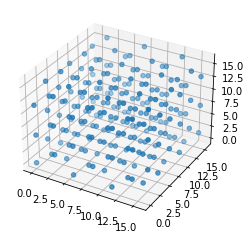

In [6]:
#Teste das coordenadas

fig = plt.figure()
ax = plt.axes(projection='3d')
x_data = []
y_data = []
z_data = []
for line in coords:
    x_data.append(line[0])
    y_data.append(line[1])
    z_data.append(line[2])
ax.scatter(x_data, y_data, z_data)
plt.show()

In [7]:
#Introduzindo condições de contorno periódicas
a_lat = 3 * 5.6575398445 #Aresta do cubo

In [8]:
#Distâncias entre vizinhos não são iguais
d_1 = 2.45
d_2 = 4.0
d_3 = 4.69
d_4 = 5.66
delta = 0.2 #"Incerteza"?

#Lista com distâncias
distances = []
dist_v1 = []
dist_v2 = []
dist_v3 = []
dist_v4 = []

#Dicionários com vizinhos
First_N = {}
Second_N = {}
Third_N = {}
Fourth_N = {}

#Para cada átomo i:
for i in range(num_atoms):
    #Definir os vizinhos
    viz1 = []
    viz2 = []
    viz3 = []
    viz4 = []
    #Recuperar coordenadas do átomo em questão
    x_0,y_0,z_0 = coords[i]
    #Para cada átomo j por átomo i:
    for j in range(num_atoms):
        #Checar se átomos já foram classificados como vizinhos de outros:
        if First_N.get(j) is not None and i in First_N[j]:
            viz1.append(j)
        elif Second_N.get(j) is not None and i in Second_N[j]:
            viz2.append(j)
        elif Third_N.get(j) is not None and i in Third_N[j]:
            viz3.append(j)
        elif Fourth_N.get(j) is not None and i in Fourth_N[j]:
            viz4.append(j)
        #Se o átomo não foi classificado ainda:
        else: 
            #Definir o fator do shift -> CCP
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    for m in [-1,0,1]:
                        shift = a_lat * np.asarray([k,l,m]) #Shift -> CCP -> fator vezes -1, 0 ou 1 -> Diferença p + ou p -
                        x, y, z = coords[j] + shift #Coordenadas do átomo j corrigidas com o shift
                        rr = np.asarray([x-x_0, y-y_0, z-z_0]) #Vetor rr = dif. em posição do átomo i com átomo j corrigido
                        dist = np.linalg.norm(rr) #Norma do vetor rr (distância)
                        distances.append(dist) #Adicionar distância de i a j na lista de distâncias
                        #Condições para determinar se são vizinhos:
                        if dist <= (d_1 + delta) and dist > (d_1 - delta): # primeiros vizinhos
                            viz1.append(j)
                            dist_v1.append(dist)
                        elif dist <= (d_2 + delta) and dist > (d_2 - delta): # segundos vizinhos
                            viz2.append(j)
                            dist_v2.append(dist)
                        elif dist <= (d_3 + delta) and dist > (d_3 - delta): # terceiros vizinhos
                            viz3.append(j)
                            dist_v3.append(dist)
                        elif dist <= (d_4 + delta) and dist > (d_4 - delta): # quartos vizinhos
                            viz4.append(j)
                            dist_v4.append(dist)
    First_N[i] = viz1
    Second_N[i]= viz2
    Third_N[i] = viz3
    Fourth_N[i]= viz4

dist_t = dist_v1 + dist_v2 + dist_v3 + dist_v4

In [9]:
dist_v1

[2.441741466426382,
 2.4715891496395477,
 2.4444731397014556,
 2.4654525986615274,
 2.5205180293525546,
 2.4710778252001875,
 2.3929721182089785,
 2.3920874400187366,
 2.3806418786131287,
 2.452121165269317,
 2.368718785039698,
 2.4219901030872735,
 2.4457611814725113,
 2.406852135973178,
 2.4216765148449166,
 2.5077576475207204,
 2.364294906494917,
 2.579117869384063,
 2.4648853691091324,
 2.5067302779620895,
 2.407695584147183,
 2.4168748850829296,
 2.4511412972721325,
 2.4639568488493677,
 2.5446262917314497,
 2.4513093384893363,
 2.435738895116287,
 2.396495712442418,
 2.534242909537534,
 2.3932083628209466,
 2.3971413665529377,
 2.4848849058201163,
 2.411934967487829,
 2.476044975678101,
 2.4393581069390966,
 2.4607153445209833,
 2.527669580578509,
 2.4614745465634904,
 2.404278999850071,
 2.5749892324366126,
 2.400097499551006,
 2.467629100789319,
 2.4238916738052523,
 2.496478369218441,
 2.4203191780237354,
 2.5035407456340506,
 2.4269250057323655,
 2.4667282688707397,
 2.404973

In [10]:
First_N

{0: [5, 70, 164, 199],
 1: [5, 6, 148, 151],
 2: [5, 7, 20, 22],
 3: [4, 5, 54, 55],
 4: [3, 10, 73, 80],
 5: [0, 1, 2, 3],
 6: [1, 10, 27, 32],
 7: [2, 27, 73, 96],
 8: [13, 54, 148, 207],
 9: [13, 14, 156, 159],
 10: [4, 6, 13, 15],
 11: [12, 13, 62, 63],
 12: [11, 18, 81, 88],
 13: [8, 9, 10, 11],
 14: [9, 18, 35, 40],
 15: [10, 35, 81, 104],
 16: [21, 62, 156, 215],
 17: [21, 22, 164, 167],
 18: [12, 14, 21, 23],
 19: [20, 21, 70, 71],
 20: [2, 19, 72, 89],
 21: [16, 17, 18, 19],
 22: [2, 17, 24, 43],
 23: [18, 43, 89, 112],
 24: [22, 29, 151, 188],
 25: [29, 30, 172, 175],
 26: [29, 31, 44, 46],
 27: [6, 7, 28, 29],
 28: [27, 34, 97, 104],
 29: [24, 25, 26, 27],
 30: [25, 34, 51, 56],
 31: [26, 51, 97, 120],
 32: [6, 37, 159, 172],
 33: [37, 38, 180, 183],
 34: [28, 30, 37, 39],
 35: [14, 15, 36, 37],
 36: [35, 42, 105, 112],
 37: [32, 33, 34, 35],
 38: [33, 42, 59, 64],
 39: [34, 59, 105, 128],
 40: [14, 45, 167, 180],
 41: [45, 46, 188, 191],
 42: [36, 38, 45, 47],
 43: [22, 23,

In [11]:
Second_N

{0: [1, 2, 3, 17, 19, 49, 50, 65, 146, 147, 163, 194],
 1: [0, 2, 3, 8, 10, 24, 27, 32, 146, 147, 154, 171],
 2: [0, 1, 3, 17, 19, 24, 27, 43, 72, 73, 89, 96],
 3: [0, 1, 2, 8, 10, 49, 50, 58, 72, 73, 80, 121],
 4: [5, 6, 7, 13, 15, 54, 55, 63, 77, 78, 85, 126],
 5: [4, 6, 7, 20, 22, 54, 55, 70, 148, 151, 164, 199],
 6: [4, 5, 7, 13, 15, 28, 29, 37, 148, 151, 159, 172],
 7: [4, 5, 6, 20, 22, 28, 29, 44, 77, 78, 94, 101],
 8: [1, 3, 9, 10, 11, 49, 57, 58, 147, 154, 155, 202],
 9: [8, 10, 11, 16, 18, 32, 35, 40, 154, 155, 162, 179],
 10: [1, 3, 8, 9, 11, 27, 32, 35, 73, 80, 81, 104],
 11: [8, 9, 10, 16, 18, 57, 58, 66, 80, 81, 88, 129],
 12: [13, 14, 15, 21, 23, 62, 63, 71, 85, 86, 93, 134],
 13: [4, 6, 12, 14, 15, 54, 62, 63, 148, 156, 159, 207],
 14: [12, 13, 15, 21, 23, 36, 37, 45, 156, 159, 167, 180],
 15: [4, 6, 12, 13, 14, 28, 36, 37, 78, 85, 86, 109],
 16: [9, 11, 17, 18, 19, 57, 65, 66, 155, 162, 163, 210],
 17: [0, 2, 16, 18, 19, 24, 40, 43, 146, 162, 163, 187],
 18: [9, 11, 16,

In [12]:
Third_N

{0: [20, 21, 22, 53, 54, 55, 148, 149, 151, 212, 214, 215],
 1: [4, 7, 13, 22, 29, 54, 149, 150, 159, 164, 172, 199],
 2: [4, 6, 21, 23, 29, 44, 55, 70, 77, 94, 151, 164],
 3: [6, 7, 13, 20, 52, 53, 63, 70, 77, 126, 148, 199],
 4: [1, 2, 8, 11, 27, 58, 72, 75, 81, 82, 104, 121],
 5: [8, 10, 17, 19, 24, 27, 49, 50, 72, 73, 146, 147],
 6: [2, 3, 8, 9, 24, 25, 34, 35, 73, 104, 154, 171],
 7: [1, 3, 10, 24, 26, 43, 72, 74, 89, 97, 99, 104],
 8: [4, 5, 6, 61, 62, 63, 156, 157, 159, 196, 198, 199],
 9: [6, 12, 15, 21, 37, 62, 148, 157, 158, 167, 180, 207],
 10: [5, 7, 12, 14, 28, 37, 54, 63, 78, 85, 148, 159],
 11: [4, 14, 15, 21, 54, 60, 61, 71, 85, 134, 156, 207],
 12: [9, 10, 16, 19, 35, 66, 80, 83, 89, 90, 112, 129],
 13: [1, 3, 16, 18, 32, 35, 57, 58, 80, 81, 154, 155],
 14: [10, 11, 16, 17, 32, 33, 42, 43, 81, 112, 162, 179],
 15: [9, 11, 18, 27, 32, 34, 73, 80, 82, 105, 107, 112],
 16: [12, 13, 14, 69, 70, 71, 164, 165, 167, 204, 206, 207],
 17: [5, 14, 20, 23, 45, 70, 151, 156, 165, 

In [13]:
Fourth_N

{0: [8, 16, 24, 48, 72, 144],
 1: [9, 17, 25, 49, 73, 145],
 2: [10, 18, 26, 50, 74, 146],
 3: [11, 19, 27, 51, 75, 147],
 4: [12, 20, 28, 52, 76, 148],
 5: [13, 21, 29, 53, 77, 149],
 6: [14, 22, 30, 54, 78, 150],
 7: [15, 23, 31, 55, 79, 151],
 8: [0, 16, 32, 56, 80, 152],
 9: [1, 17, 33, 57, 81, 153],
 10: [2, 18, 34, 58, 82, 154],
 11: [3, 19, 35, 59, 83, 155],
 12: [4, 20, 36, 60, 84, 156],
 13: [5, 21, 37, 61, 85, 157],
 14: [6, 22, 38, 62, 86, 158],
 15: [7, 23, 39, 63, 87, 159],
 16: [0, 8, 40, 64, 88, 160],
 17: [1, 9, 41, 65, 89, 161],
 18: [2, 10, 42, 66, 90, 162],
 19: [3, 11, 43, 67, 91, 163],
 20: [4, 12, 44, 68, 92, 164],
 21: [5, 13, 45, 69, 93, 165],
 22: [6, 14, 46, 70, 94, 166],
 23: [7, 15, 47, 71, 95, 167],
 24: [0, 32, 40, 48, 96, 168],
 25: [1, 33, 41, 49, 97, 169],
 26: [2, 34, 42, 50, 98, 170],
 27: [3, 35, 43, 51, 99, 171],
 28: [4, 36, 44, 52, 100, 172],
 29: [5, 37, 45, 53, 101, 173],
 30: [6, 38, 46, 54, 102, 174],
 31: [7, 39, 47, 55, 103, 175],
 32: [8, 2

In [14]:
dist_v1

[2.441741466426382,
 2.4715891496395477,
 2.4444731397014556,
 2.4654525986615274,
 2.5205180293525546,
 2.4710778252001875,
 2.3929721182089785,
 2.3920874400187366,
 2.3806418786131287,
 2.452121165269317,
 2.368718785039698,
 2.4219901030872735,
 2.4457611814725113,
 2.406852135973178,
 2.4216765148449166,
 2.5077576475207204,
 2.364294906494917,
 2.579117869384063,
 2.4648853691091324,
 2.5067302779620895,
 2.407695584147183,
 2.4168748850829296,
 2.4511412972721325,
 2.4639568488493677,
 2.5446262917314497,
 2.4513093384893363,
 2.435738895116287,
 2.396495712442418,
 2.534242909537534,
 2.3932083628209466,
 2.3971413665529377,
 2.4848849058201163,
 2.411934967487829,
 2.476044975678101,
 2.4393581069390966,
 2.4607153445209833,
 2.527669580578509,
 2.4614745465634904,
 2.404278999850071,
 2.5749892324366126,
 2.400097499551006,
 2.467629100789319,
 2.4238916738052523,
 2.496478369218441,
 2.4203191780237354,
 2.5035407456340506,
 2.4269250057323655,
 2.4667282688707397,
 2.404973

In [15]:
#Teste dos valores de distância

print(len(distances))
print(max(distances))
print(min(distances))
print(len(dist_t))

1160676
54.786135665434614
0.0
3668


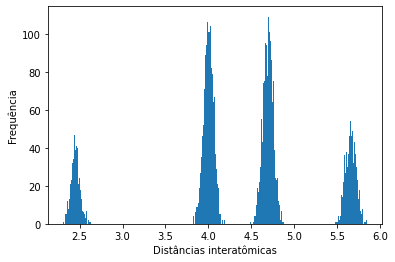

In [16]:
#Histograma com frequências em y
plt.hist(dist_t, bins=300)
plt.xlabel('Distâncias interatômicas')
plt.ylabel('Frequência')
plt.show()

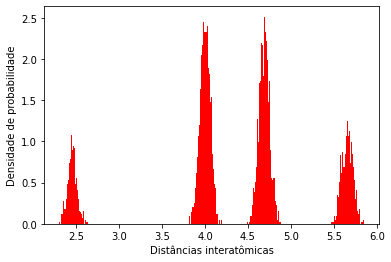

In [17]:
#Histograma com probabilidades em y
plt.hist(dist_t, bins=300, color='red', density=True)
plt.xlabel('Distâncias interatômicas')
plt.ylabel('Densidade de probabilidade')
plt.show()

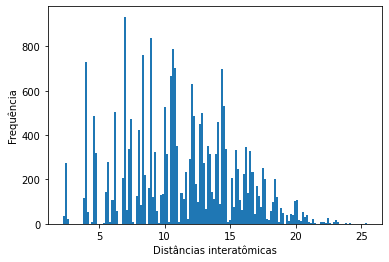

In [18]:
#Histograma teste das distâncias radiais --> sem condições de contorno

plt.hist(dist_2, bins=150)
plt.xlabel('Distâncias interatômicas')
plt.ylabel('Frequência')
plt.show()

In [19]:
# Determinando propriedades da primeira camada de coordenação
#First_N

In [20]:
#Teste das coordenadas

#print(coords)
#print(coords[0,:])
#print(coords[0])
#print(coords[1])

In [21]:
print('Primeiros vizinhos')
for key in First_N: #Para cada átomo key
    i = key
    r_i = coords[i,:] #Coordenadas de i
    print('Átomo', i)
    for element in First_N[i]: #Para cada átomo vizinho de i
        j=element
        #print(j)
        r_j = coords[j,:] #Coordenadas do vizinho j
        rr = r_j - r_i #Vetor dif. posição entre i e j
        dist = np.linalg.norm(rr) #Módulo do vetor = distância
        #print(i, dist) #Mostrar átomo i e distância até o átomo j
        print('Vizinho: átomo', j, ' ', 'Distância =', dist) #Mostrar vizinho j e distância até ele

Primeiros vizinhos
Átomo 0
Vizinho: átomo 5   Distância = 2.441741466426382
Vizinho: átomo 70   Distância = 22.02519603503527
Vizinho: átomo 164   Distância = 22.047613520719274
Vizinho: átomo 199   Distância = 22.017228448497725
Átomo 1
Vizinho: átomo 5   Distância = 2.5205180293525546
Vizinho: átomo 6   Distância = 2.4710778252001875
Vizinho: átomo 148   Distância = 15.71535910993383
Vizinho: átomo 151   Distância = 15.666873512629046
Átomo 2
Vizinho: átomo 5   Distância = 2.3806418786131287
Vizinho: átomo 7   Distância = 2.452121165269317
Vizinho: átomo 20   Distância = 15.701017339337042
Vizinho: átomo 22   Distância = 15.825428551499394
Átomo 3
Vizinho: átomo 4   Distância = 2.4457611814725113
Vizinho: átomo 5   Distância = 2.406852135973178
Vizinho: átomo 54   Distância = 15.689035667226884
Vizinho: átomo 55   Distância = 15.604319432056615
Átomo 4
Vizinho: átomo 3   Distância = 2.4457611814725113
Vizinho: átomo 10   Distância = 2.364294906494917
Vizinho: átomo 73   Distância = 2